alpha [0 3]
((2, 0, 0, 0), (2, 0, 0, 1))
[[ 1.          0.          0.          0.        ]
 [-0.07111993  0.64385925 -1.50205146  1.        ]]
[[ 1.         -0.07111993]
 [ 0.          0.64385925]
 [ 0.         -1.50205146]
 [ 0.          1.        ]]


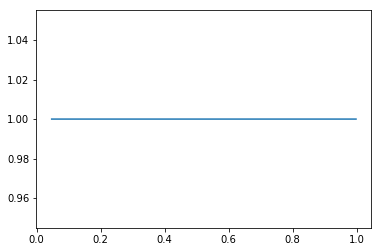

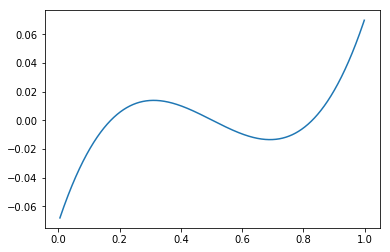

In [4]:
import pandas as pd
import numpy as np
import utils as u
import datatools as dt
import polytools as pt
import matplotlib.pyplot as plt

# data location
url='../data/InputParameters.txt'

# load data
dataframe=pd.read_csv(url,header=None,sep='\s+ ',engine='python')

srcs=[0,1]
No=4
Nr=2
method=0
NrRange=np.arange(Nr+1)
dim=len(srcs)

Hdict=dt.genHankel(dataframe,srcs,NrRange,No)
#print(Hdict)
# further with test004
R,W=dt.genRootsWeights(Hdict,method)
#print(R,W)
PCdict=dt.genPCs(Hdict,method)
nPCdict=dt.genNPCs(PCdict,R,W)

Alphas=u.genMultiIdx(No,dim)
ak=3
print("alpha",Alphas[ak])

Nrs=[2, 2]
aNrs=[0, 0]
Nris=[0, 0]
#srcs=[0, 1]

mk=u.genMultiKey(Nrs,aNrs,Nris,srcs)
mk[1][u.ParPos['aNr']]
print(mk)

aR,aW=dt.genRW4mkey(mk,R,W)
#aR
Cfs=dt.PCfs4eval(PCdict,mk,Alphas[ak])
print(Cfs)

xa=np.array(dataframe[srcs[0]])
xb=np.array(dataframe[srcs[1]])
xa.sort()
xb.sort()
X=np.array([xa,xb]).T
Y=pt.PCeval(Cfs,X)

plt.plot(X[:,0],Y[:,0])
plt.show()

plt.plot(X[:,1],Y[:,1])
plt.show()
